In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='02-Chunk1', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 1

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.852 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.486 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.066 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.072 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.607 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.852 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.267 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

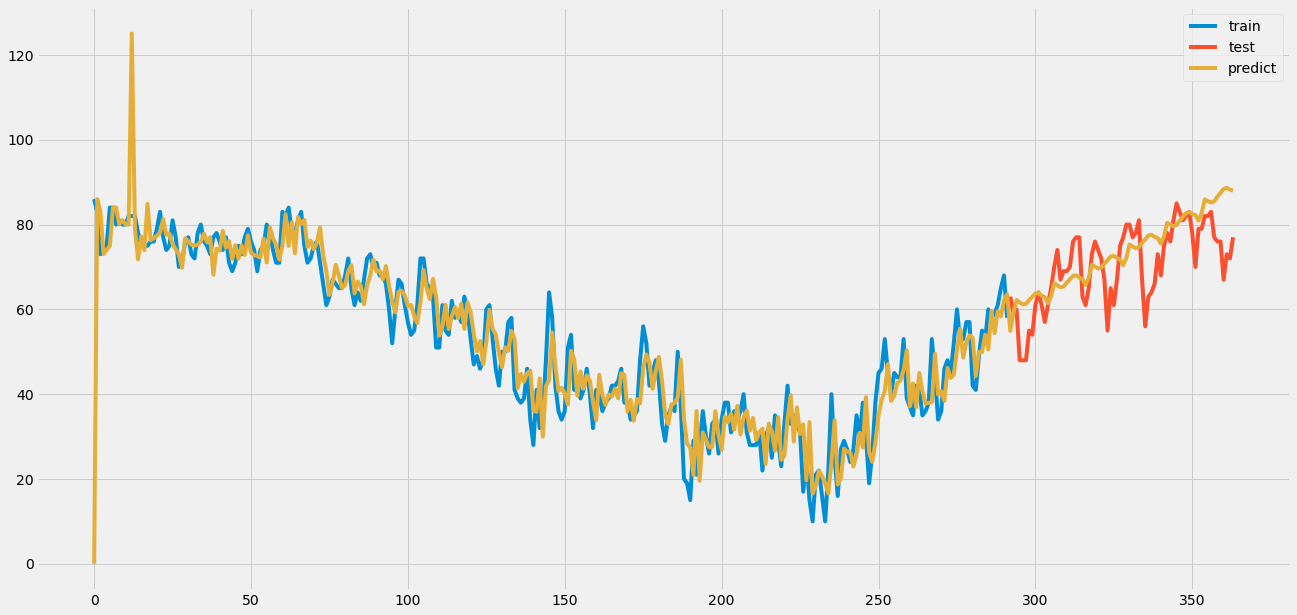

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.50479452055  Num NaN: 0'

'Test Error: 4.60555555556    Num NaN: 0'

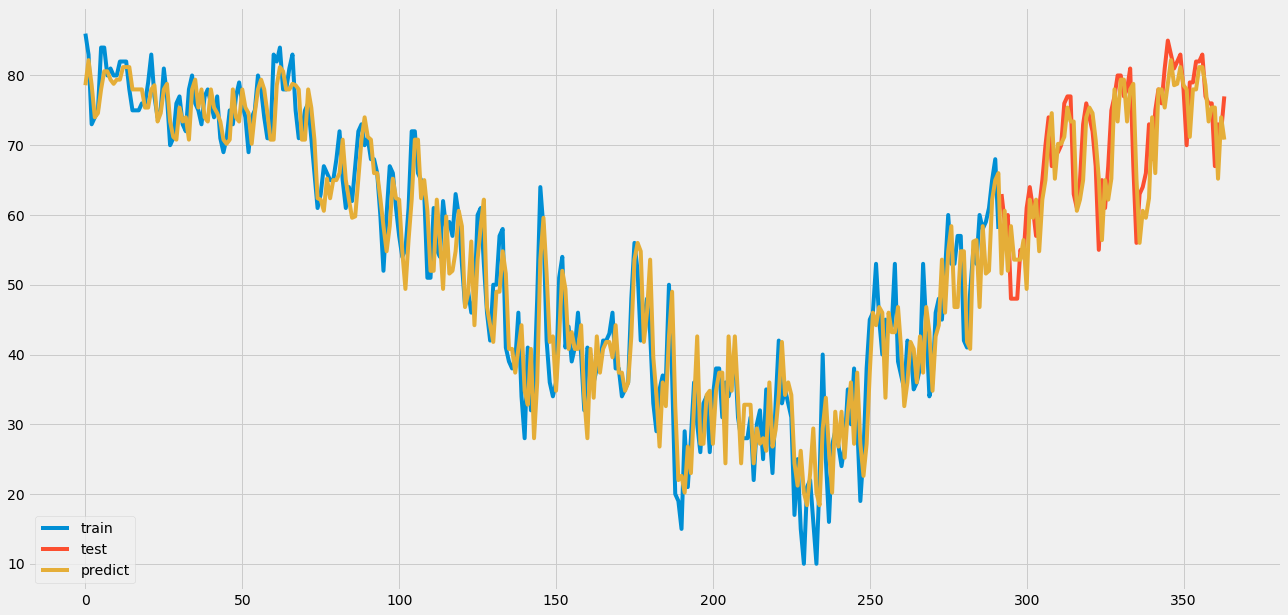

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 598047702857.0  Num NaN: 0'

'Test Error: 808072121304.0    Num NaN: 0'

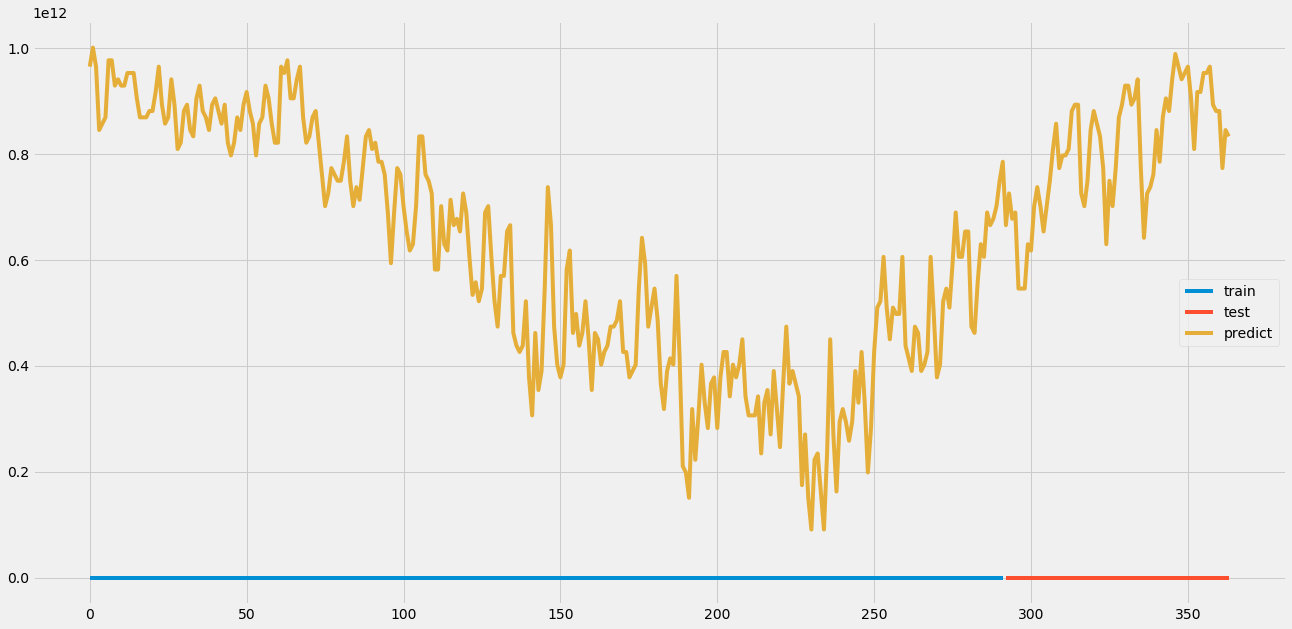

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.33293082673  Num NaN: 0'

'Test Error: 4.51395781302    Num NaN: 0'

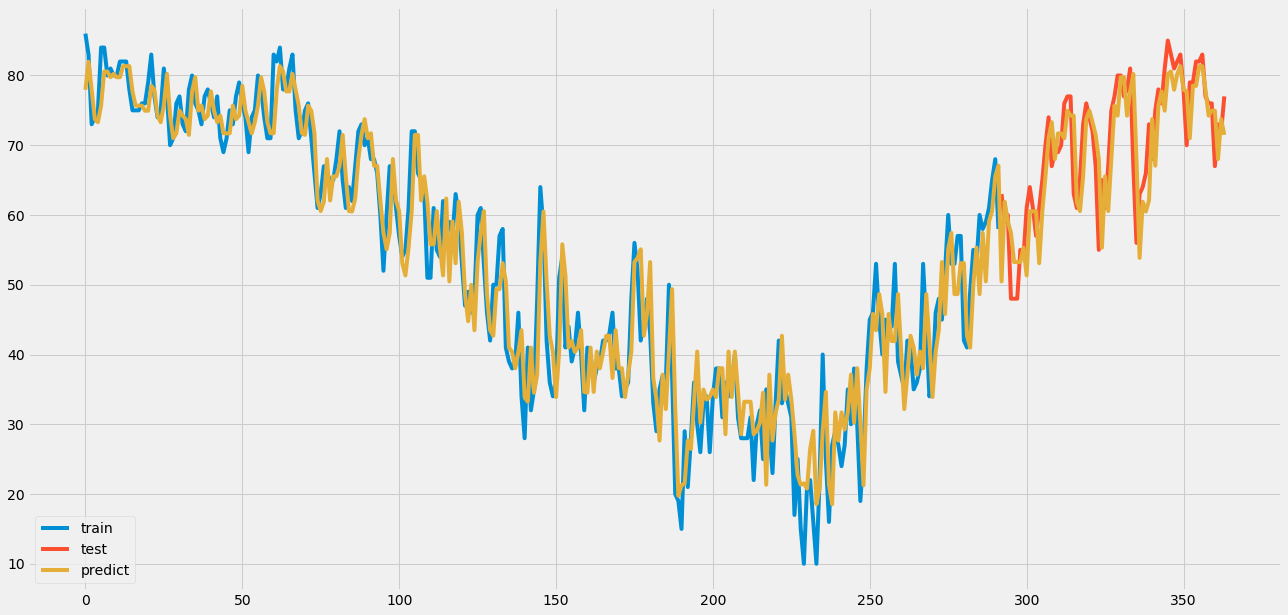

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.70178861693  Num NaN: 0'

'Test Error: 4.87332342673    Num NaN: 0'

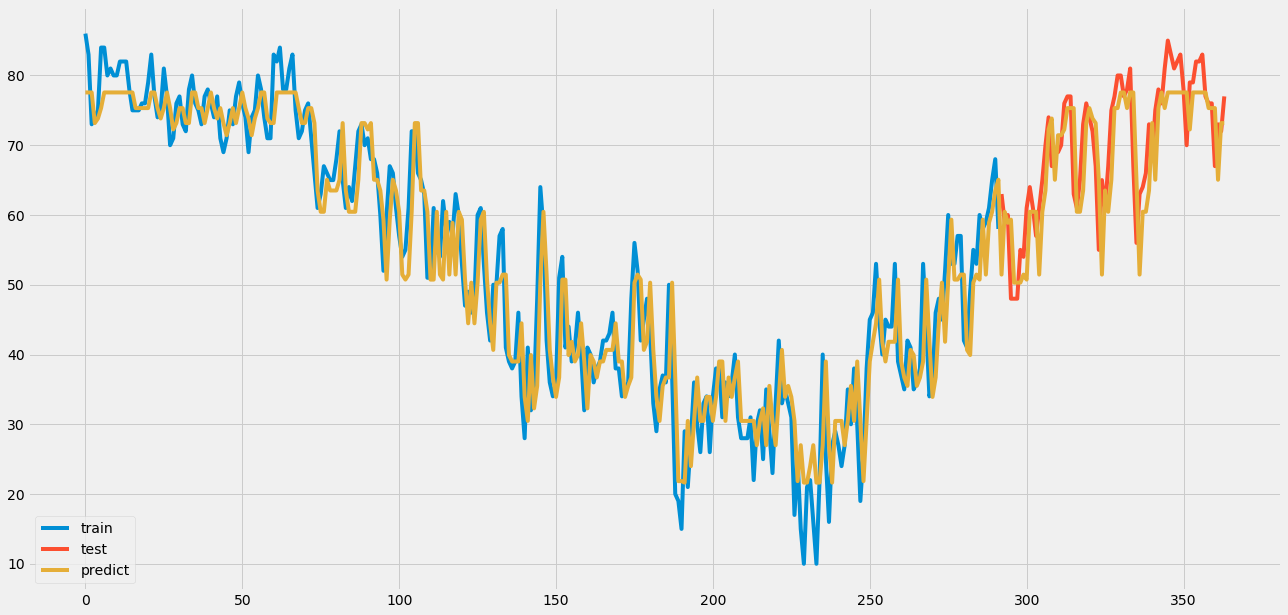

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.26186738031  Num NaN: 0'

'Test Error: 4.49174492061    Num NaN: 0'

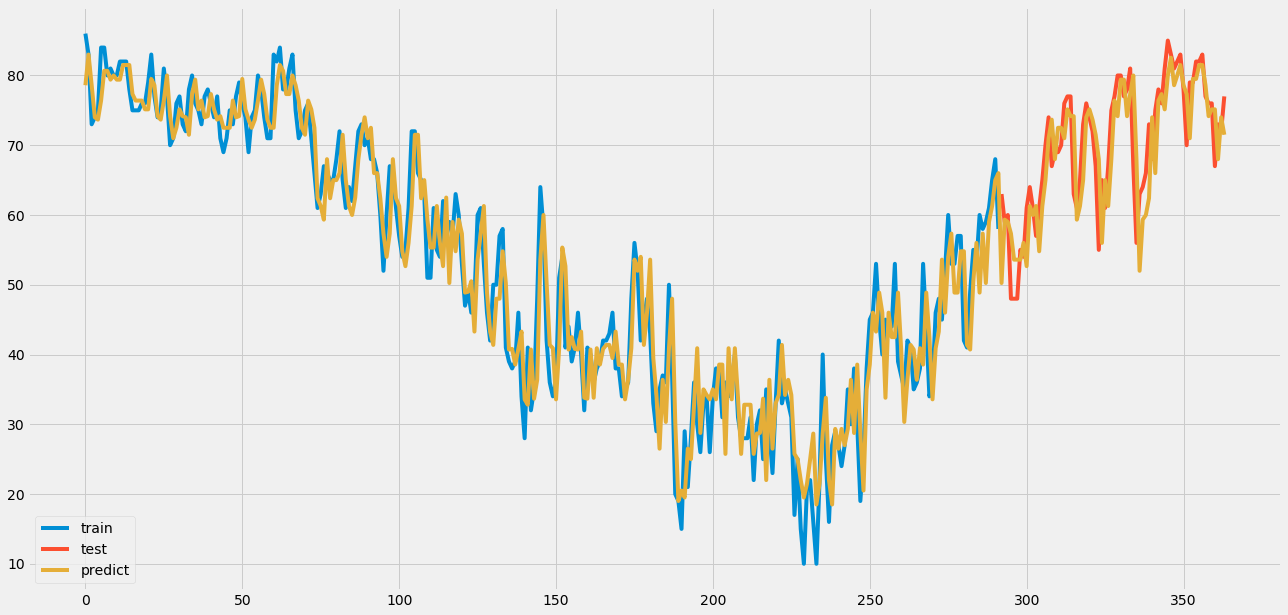

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 6.4534739547  Num NaN: 1'

'Test Error: 6.17181072724    Num NaN: 1'

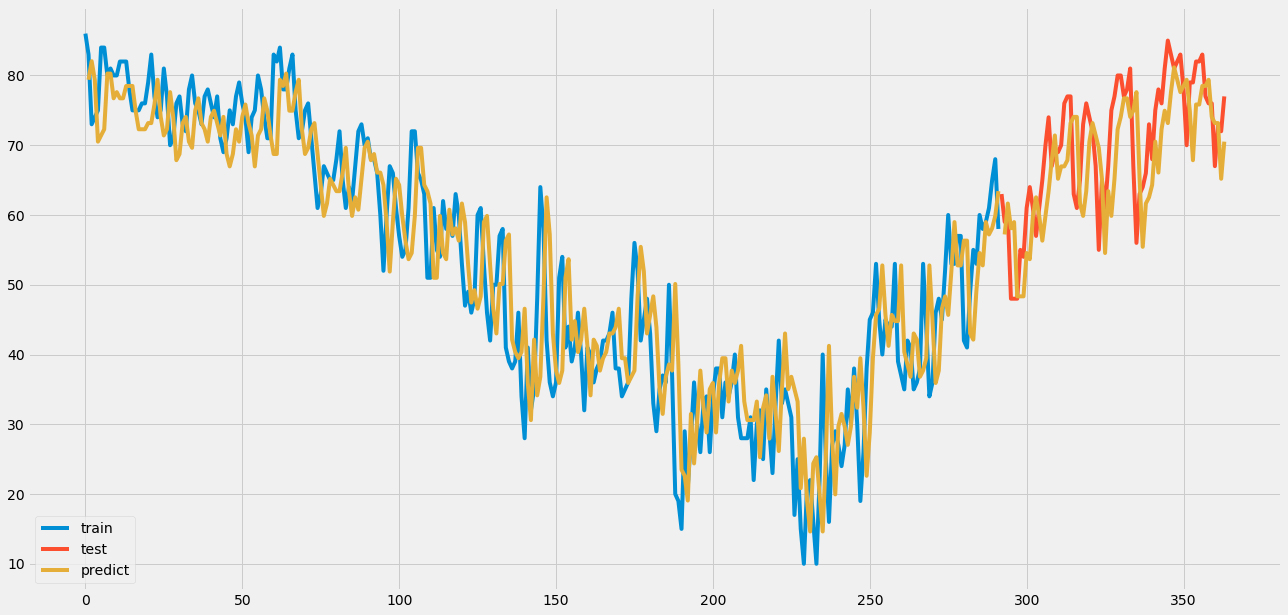

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 291 samples, validate on 71 samples
Epoch 1/10
 - 1s - loss: 0.2941 - val_loss: 0.8269
Epoch 2/10
 - 0s - loss: 0.2084 - val_loss: 0.1105
Epoch 3/10
 - 0s - loss: 0.2142 - val_loss: 0.3801
Epoch 4/10
 - 0s - loss: 0.2119 - val_loss: 1.0077
Epoch 5/10
 - 0s - loss: 0.2202 - val_loss: 0.3241
Epoch 6/10
 - 0s - loss: 0.1913 - val_loss: 0.1410
Epoch 7/10
 - 0s - loss: 0.2106 - val_loss: 0.1239
Epoch 8/10
 - 0s - loss: 0.2004 - val_loss: 0.3390
Epoch 9/10
 - 0s - loss: 0.1948 - val_loss: 0.1169
Epoch 10/10
 - 0s - loss: 0.2120 - val_loss: 0.2319


'Train Error: 14.9675695806  Num NaN: 1'

'Test Error: 17.3891244808    Num NaN: 1'

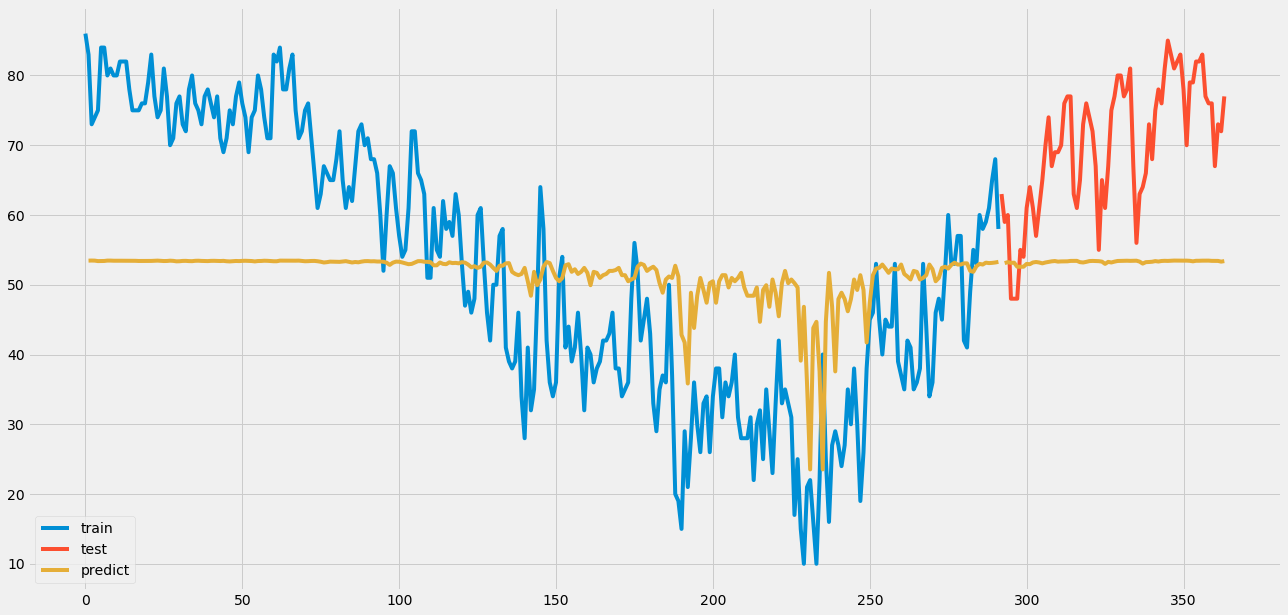

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 291 samples, validate on 71 samples
Epoch 1/10
 - 1s - loss: 0.2697 - val_loss: 0.1086
Epoch 2/10
 - 0s - loss: 0.2420 - val_loss: 0.8036
Epoch 3/10
 - 0s - loss: 0.2573 - val_loss: 0.6345
Epoch 4/10
 - 0s - loss: 0.2401 - val_loss: 0.5338
Epoch 5/10
 - 0s - loss: 0.2321 - val_loss: 0.2759
Epoch 6/10
 - 0s - loss: 0.2302 - val_loss: 0.1045
Epoch 7/10
 - 0s - loss: 0.2336 - val_loss: 0.2443
Epoch 8/10
 - 0s - loss: 0.2573 - val_loss: 0.5466
Epoch 9/10
 - 0s - loss: 0.2319 - val_loss: 0.1401
Epoch 10/10
 - 0s - loss: 0.2463 - val_loss: 0.2073


'Train Error: 33.6613245699  Num NaN: 1'

'Test Error: 15.5483581113    Num NaN: 1'

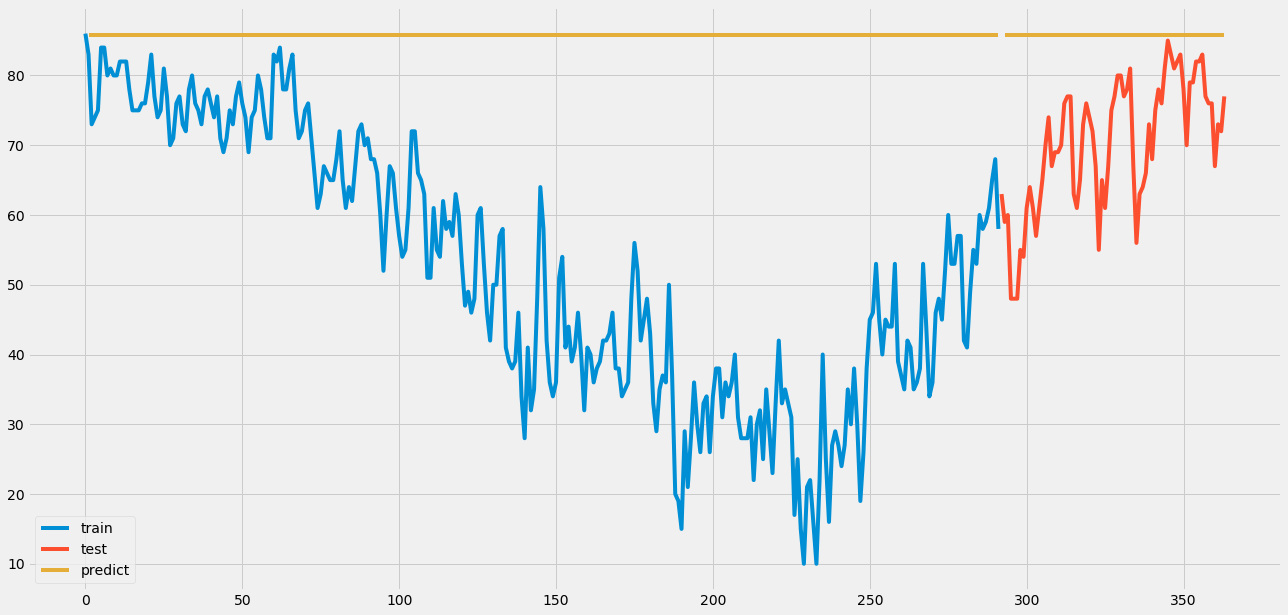

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 293 samples, validate on 73 samples
Epoch 1/10
 - 1s - loss: 0.3081 - val_loss: 0.0983
Epoch 2/10
 - 0s - loss: 0.0597 - val_loss: 0.0219
Epoch 3/10
 - 0s - loss: 0.0116 - val_loss: 0.0032
Epoch 4/10
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 5/10
 - 0s - loss: 9.6225e-04 - val_loss: 6.8652e-04
Epoch 6/10
 - 0s - loss: 8.0968e-04 - val_loss: 7.3495e-04
Epoch 7/10
 - 0s - loss: 7.5617e-04 - val_loss: 5.0887e-04
Epoch 8/10
 - 0s - loss: 6.7911e-04 - val_loss: 5.5696e-04
Epoch 9/10
 - 0s - loss: 6.8124e-04 - val_loss: 7.8985e-04
Epoch 10/10
 - 0s - loss: 6.7278e-04 - val_loss: 4.8438e-04


'Train Error: 7.50960317377  Num NaN: 0'

'Test Error: 4.91525475184    Num NaN: 0'

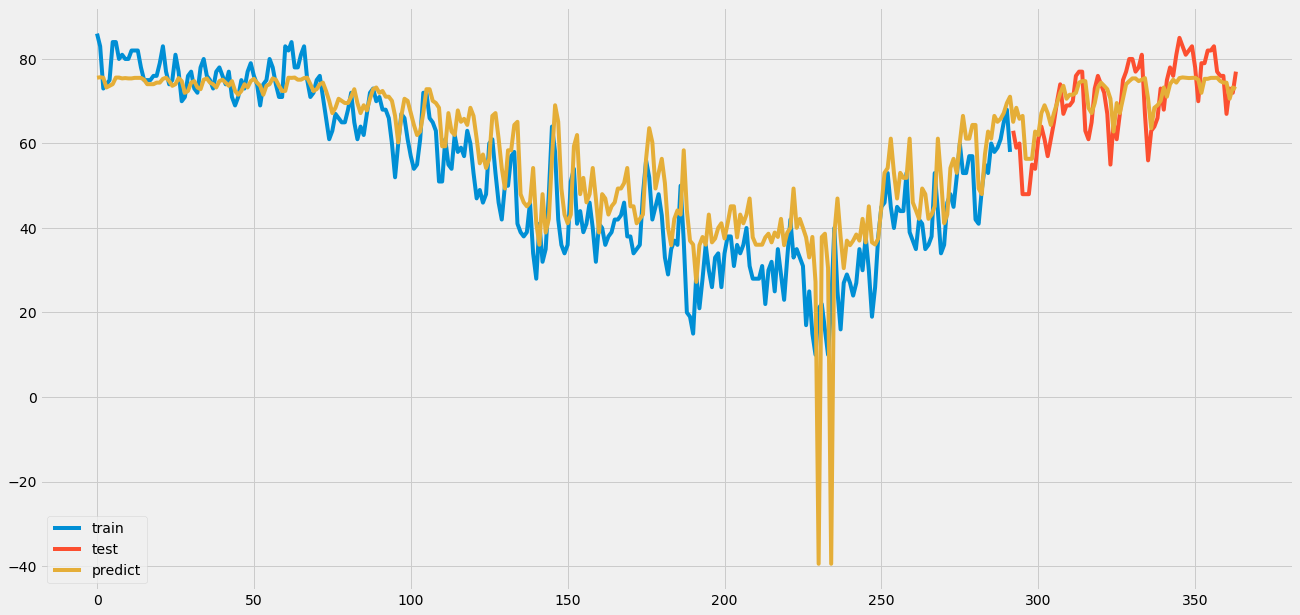

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.1778 - val_loss: 1.0626
Epoch 2/10
 - 1s - loss: 0.9726 - val_loss: 0.8912
Epoch 3/10
 - 1s - loss: 0.7827 - val_loss: 0.7209
Epoch 4/10
 - 1s - loss: 0.6322 - val_loss: 0.5343
Epoch 5/10
 - 1s - loss: 0.4450 - val_loss: 0.4710
Epoch 6/10
 - 1s - loss: 0.3833 - val_loss: 0.4300
Epoch 7/10
 - 1s - loss: 0.3402 - val_loss: 0.3995
Epoch 8/10
 - 1s - loss: 0.3084 - val_loss: 0.3759
Epoch 9/10
 - 1s - loss: 0.2838 - val_loss: 0.3562
Epoch 10/10
 - 1s - loss: 0.2628 - val_loss: 0.3323


'Train Error: 2442.96487322  Num NaN: 0'

'Test Error: 3351.14901394    Num NaN: 0'

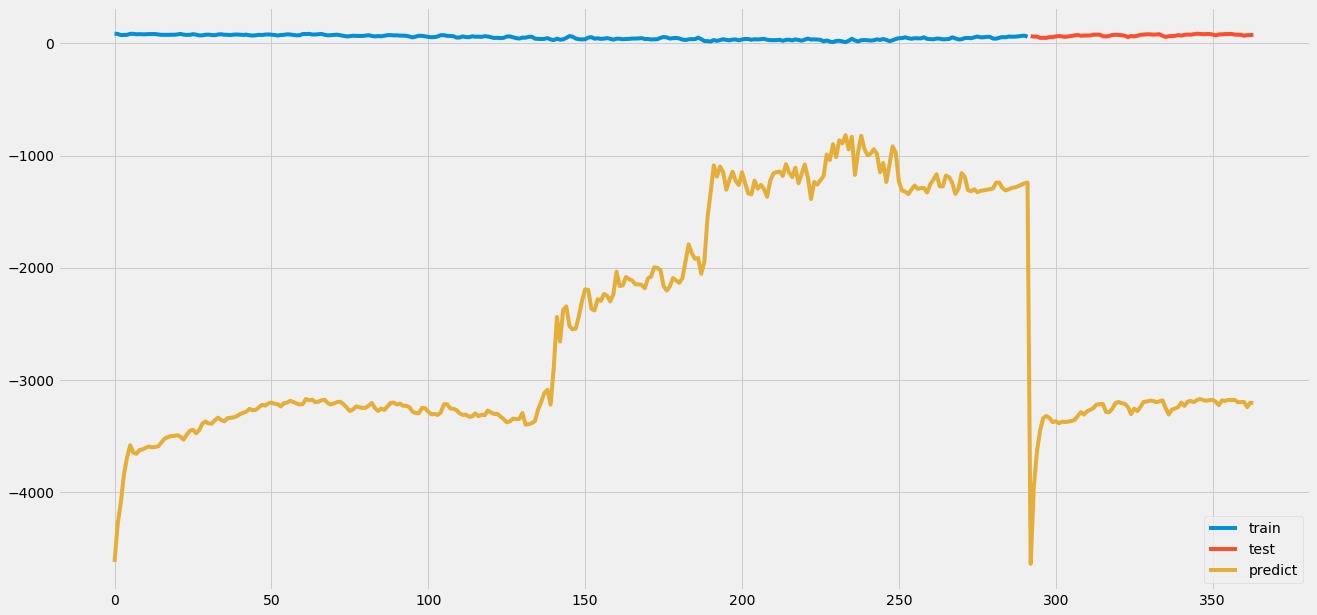

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')